# Import library yang diperlukan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [34]:
sns.set(style="whitegrid", color_codes=True)
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3 * cm.max() / 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Load Dataset

In [35]:
df = pd.read_csv("data/parkinsons_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


In [36]:
# check for most values in some column
value_counts = df['DoctorInCharge'].value_counts()
print(value_counts)

DoctorInCharge
DrXXXConfid    2105
Name: count, dtype: int64


# Dimensions of Dataset

In [37]:
df.shape

(2105, 35)

# Statistical Summary

In [38]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Information of the Dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

# Duplicate Entries

In [40]:
df.duplicated().sum()

0

Unwanted Columns

In [41]:
df.drop(columns="DoctorInCharge", axis=1, inplace=True)
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,8.336364,3.200969,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,28.634010,8.076254,1,0,0,0,1,1,0,0
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,13.106537,1.665751,0,0,0,1,0,1,1,1
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,26.527734,4.785614,0,0,0,0,1,1,0,1
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,19.873404,8.378979,1,0,1,0,0,1,1,1


In [42]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [43]:
df.notnull()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2101,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2102,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2103,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


# Outliers

In [44]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [45]:
df.skew()

PatientID                   0.000000
Age                        -0.033460
Gender                      0.029478
Ethnicity                   1.244965
EducationLevel              0.163214
BMI                         0.035171
Smoking                     0.892115
AlcoholConsumption         -0.019206
PhysicalActivity            0.025594
DietQuality                 0.034928
SleepQuality                0.008514
FamilyHistoryParkinsons     2.008275
TraumaticBrainInjury        2.554546
Hypertension                2.008275
Diabetes                    1.981515
Depression                  1.460803
Stroke                      4.184889
SystolicBP                  0.028523
DiastolicBP                -0.057021
CholesterolTotal           -0.050801
CholesterolLDL             -0.017991
CholesterolHDL              0.001855
CholesterolTriglycerides    0.017058
UPDRS                      -0.048271
MoCA                       -0.023930
FunctionalAssessment        0.011272
Tremor                      0.275451
R

# Determining Depentend & Independent Variables

In [46]:
# x = df.loc[:, df.columns != 'Diagnosis'].values[:, 1:]
# x1 = df.loc[:, df.columns != 'Diagnosis']
# y = df.loc[:, 'Diagnosis'].values
# y1 = df.loc[:, 'Diagnosis']

X = df.drop(['Diagnosis', 'PatientID'], axis=1)
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,6.458713,29.181289,1.572427,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,37.306703,12.332639,4.787551,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,67.838170,29.927783,2.130686,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,52.964696,21.304268,3.391288,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,21.804880,8.336364,3.200969,0,0,0,1,0,1,0


In [47]:
Y = df['Diagnosis']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Diagnosis, dtype: int64

In [48]:
Y.value_counts(normalize=True)

Diagnosis
1    0.619477
0    0.380523
Name: proportion, dtype: float64

In [49]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y)

# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1578, 32)
y_train shape:  (1578,)
X_test shape:  (527, 32)
y_test shape:  (527,)


# k-NN
## In k-NN, the basic idea is to predict the label of a new instance based on the labels of its k nearest neighbors in the training data. 

## We import the library 


In [50]:
from sklearn.neighbors import KNeighborsClassifier

## we create a knn object 

In [51]:
knn = KNeighborsClassifier(n_neighbors=2)

## we fit the object

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Make predictions on the testing data

In [53]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

## We can  get a probability of belonging to a each class for each sample, here are the first ten

In [54]:
knn.predict_proba(X_test)[0:10]

array([[1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5]])

## The confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions. The classification report provides the precision, recall, F1-score, and support for each class, which are important metrics for evaluating the performance of a classifier. The accuracy score is a simple metric that calculates the proportion of correct predictions out of the total predictions made by the model. These three elements together provide a comprehensive evaluation of the classifier's performance on the test dataset. Let's prints the confusion matrix, classification report, and accuracy score for a given classification model.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
y_hat = knn.predict(X)

Confusion matrix, without normalization
[[140  63]
 [144 180]]


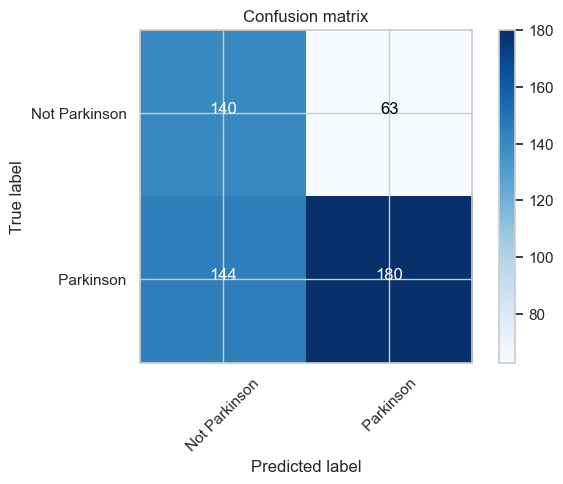

In [57]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Not Parkinson", " Parkinson"],
                      title='Confusion matrix')

In [58]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.69      0.57       203
           1       0.74      0.56      0.63       324

    accuracy                           0.61       527
   macro avg       0.62      0.62      0.60       527
weighted avg       0.65      0.61      0.61       527


Accuracy Score: 0.6072106261859582


# K-Means

In [59]:
X = df
y = df['Diagnosis']

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Diagnosis'] = le.fit_transform(X['Diagnosis'])

y = le.transform(y)

In [61]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

KMeans(n_clusters=3)

In [63]:
kmeans.cluster_centers_

array([[ 4.97306981e-01,  5.26620666e-01,  4.98338870e-01,
         2.36987818e-01,  4.50719823e-01,  4.94014855e-01,
         2.77408638e-01,  5.11849073e-01,  5.16051232e-01,
         4.82423233e-01,  4.91792284e-01,  1.59468439e-01,
         1.19601329e-01,  1.44518272e-01,  1.67774086e-01,
         2.50830565e-01,  4.31893688e-02,  4.82231513e-01,
         5.06954220e-01,  5.19351158e-01,  5.08521708e-01,
         4.81877917e-01,  5.13920757e-01,  6.04249052e-01,
         4.54899845e-01,  4.06395485e-01,  2.22044605e-16,
         3.37209302e-01,  2.97342193e-01,  2.37541528e-01,
         2.92358804e-01,  2.30897010e-01,  3.03986711e-01,
         1.00000000e+00],
       [ 4.85418062e-01,  5.10198135e-01,  5.01420455e-01,
         2.23958333e-01,  4.44128788e-01,  4.95867795e-01,
         3.18181818e-01,  5.09546076e-01,  4.94459315e-01,
         4.89121264e-01,  4.88356458e-01,  1.40625000e-01,
         1.05113636e-01,  1.42045455e-01,  1.61931818e-01,
         2.00284091e-01,  6.25

In [64]:
kmeans.inertia_

7985.879754834717

In [65]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))

Result: 702 out of 2105 samples were correctly labeled.
Accuracy score: 0.33


# K-NN and K-Means Hybrid

In [66]:
from sklearn.utils import check_X_y, check_array
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [67]:
def fit_kmeans_knn(X, y, n_centroids=50000, random_state=0, verbose=False):
    X, y = check_X_y(X, y)
    classes_ = np.unique(y)
    assert np.array_equal(classes_, np.arange(2))  # Assumes binary classification

    X = X.astype(np.float32)
    kmeans = KMeans(n_clusters=n_centroids, random_state=random_state, verbose=verbose)
    kmeans.fit(X)
    I = kmeans.predict(X)

    centroid_data = pd.DataFrame({'I': I, 'y': y})
    agg_data = centroid_data.groupby('I').agg(['mean', 'count']).values
    centroid_probs = agg_data[:, 0]
    centroid_weights = agg_data[:, 1]

    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(kmeans.cluster_centers_)

    return kmeans, neigh, centroid_probs, centroid_weights

In [68]:
def predict_proba_kmeans_knn(X, kmeans, neigh, centroid_probs, centroid_weights, n_neighbors=2):
    X = check_array(X)
    distances, I = neigh.kneighbors(X, n_neighbors=n_neighbors)
    probs = centroid_probs[I]
    weights = centroid_weights[I]
    p = np.average(probs, axis=1, weights=weights)
    return np.c_[1 - p, p]

In [69]:
def predict_kmeans_knn(X, kmeans, neigh, centroid_probs, centroid_weights, n_neighbors=2):
    return np.around(
        predict_proba_kmeans_knn(X, kmeans, neigh, centroid_probs, centroid_weights, n_neighbors)[:, 1]).astype(
        np.int32)

In [70]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1)

y = df['Diagnosis']

In [71]:
kfold = ShuffleSplit(1)
scores = []

print("\nClassification Report:\n")
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit model
    kmeans, neigh, centroid_probs, centroid_weights = fit_kmeans_knn(X_train_scaled, y_train, n_centroids=3)

    # Predict probabilities
    y_pred_proba = predict_proba_kmeans_knn(X_test_scaled, kmeans, neigh, centroid_probs, centroid_weights)
    y_pred = y_pred_proba[:, 1]

    # Calculate ROC AUC score
    score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    
    y_pred = y_pred >= 0
    print(classification_report(y_test, y_pred, zero_division=0))

print("\nROC AUC Score:", F'{np.mean(scores):.5f} ± {np.std(scores):.5f}')



Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.58      1.00      0.74       123

    accuracy                           0.58       211
   macro avg       0.29      0.50      0.37       211
weighted avg       0.34      0.58      0.43       211


ROC AUC Score: 0.51571 ± 0.00000
